# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Predict the salary of an individual using data about prior individuals and their qualifications

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
#etc

#your info here
__author__ = "Vijay Raj Saravanan Radhakrishnan"
__email__ = "vijay_saravanan@outlook.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_set = pd.read_csv("data/train_features.csv")
train_target = pd.read_csv("data/train_salaries.csv")
print(train_set.head(5))
print(train_target.head(5))


              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16  
              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163


In [3]:
train_set.shape

(1000000, 8)

In [4]:
train_set.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [5]:
train_set.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [6]:
train_set.describe(include=["O"])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684957344,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### ---- 3 Clean the data ----

In [7]:
train_set.duplicated().sum()

0

In [8]:
columns = list(train_set.columns.values)
edited_column_names = [name.lower() for name in columns]
train_set.columns = edited_column_names

columns = list(train_target.columns.values)
edited_column_names = [name.lower() for name in columns]
train_target.columns = edited_column_names

In [9]:
train_set["jobtype"] = train_set.jobtype.astype("category")
train_set["degree"] = train_set.degree.astype("category")
train_set["major"] = train_set.major.astype("category")
train_set["industry"] = train_set.industry.astype("category")
train_set["companyid"] = train_set.companyid.astype("category")
print(train_set.dtypes)

jobid                    object
companyid              category
jobtype                category
degree                 category
major                  category
industry               category
yearsexperience           int64
milesfrommetropolis       int64
dtype: object


### ---- 4 Explore the data (EDA) ----

In [14]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features
def visualize_relationship(df, feature):
    if df[feature].dtype.name == "category":
        if feature == "companyId":
            pass
        elif feature == "salary":
            plt.hist(df[feature])
            plt.xlabel("Salary")
            plt.ylabel("Frequency")
        else:
            plt.figure(figsize=(16,8))
            plt.subplot(121)
            sb.countplot(data=df, x=feature)
            plt.xlabel(feature.capitalize())
            plt.ylabel("Frequency")
            plt.xticks(rotation=45)
            
            plt.subplot(122)
            sb.boxplot(df[feature], train_target["salary"])
            plt.xticks(rotation = 45)
            
                         
    if df[feature].dtype.name == "int64":
        plt.figure(figsize=(16, 8))
        plt.subplot(121)
        plt.hist(df[feature])
        plt.xlabel(feature.capitalize())
        plt.ylabel("Frequency")
        
        plt.subplot(122)
        plt.scatter(df[feature], train_target["salary"], alpha=0.2)
        plt.xlabel(feature.capitalize())
        plt.ylabel("Salary")
        plt.title("{} vs {}".format("Salary", feature.capitalize()))

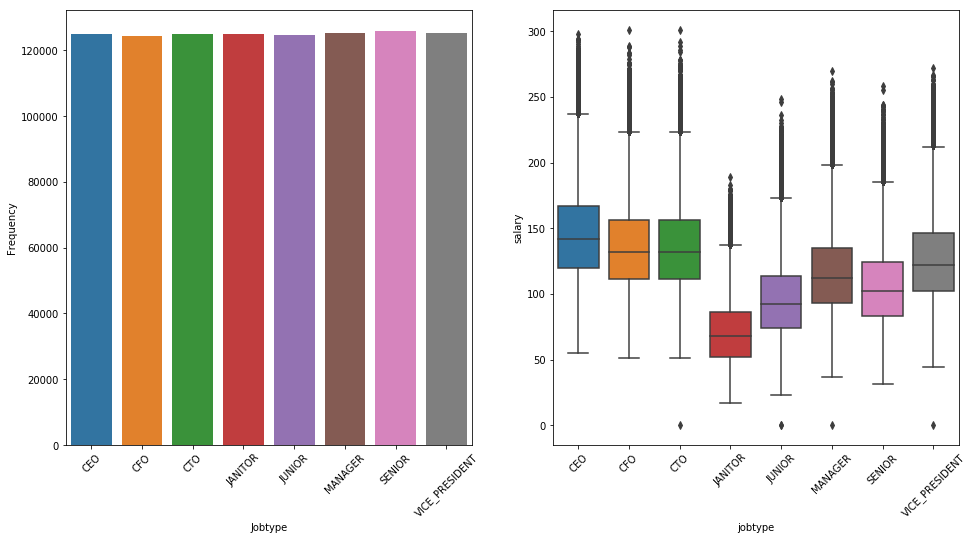

In [18]:
visualize_relationship(train_set, "jobtype")

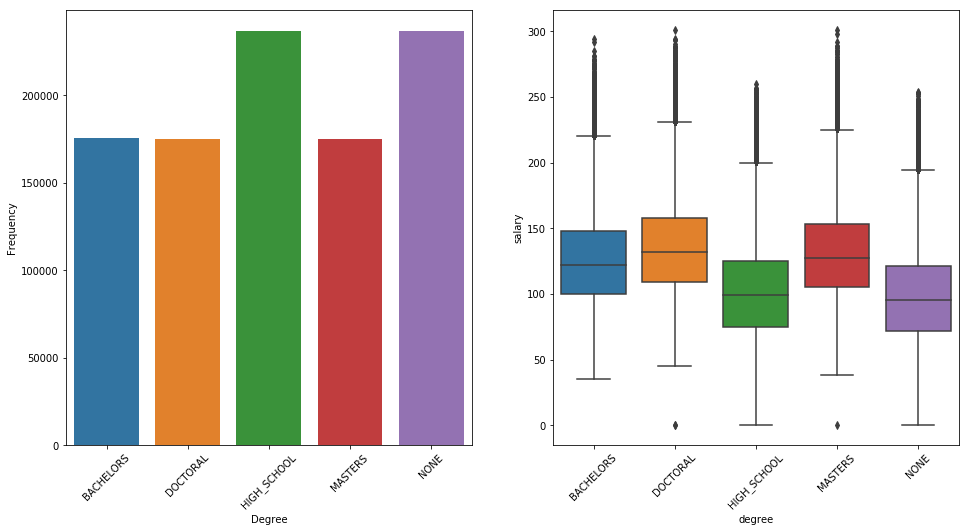

In [19]:
visualize_relationship(train_set, "degree")

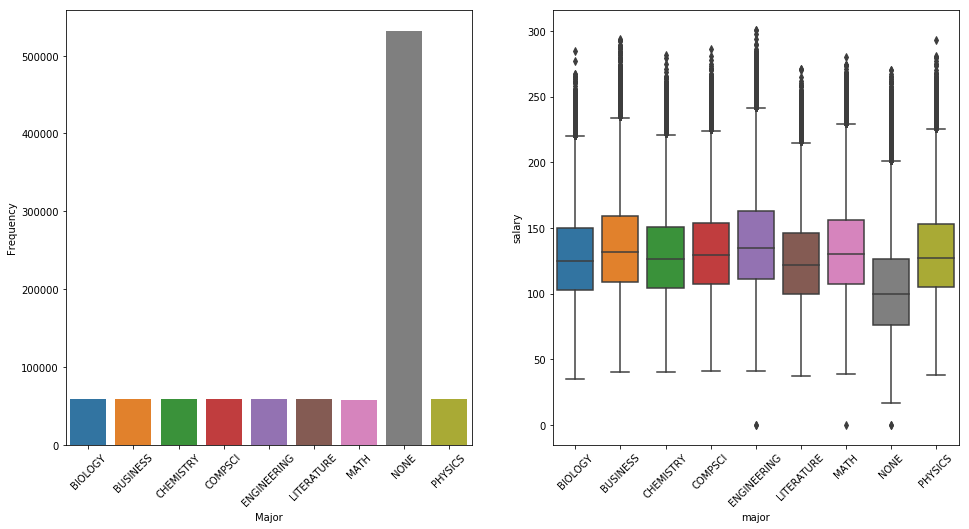

In [20]:
visualize_relationship(train_set, "major")

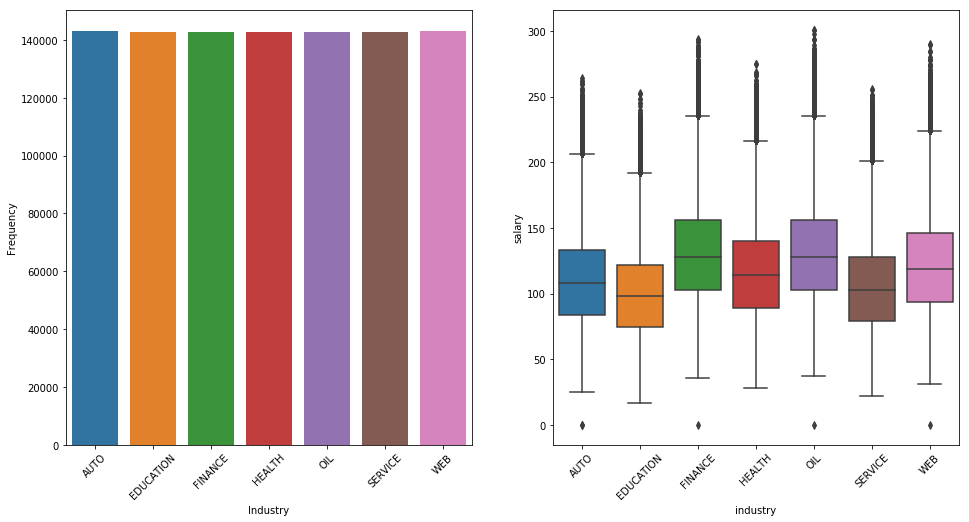

In [21]:
visualize_relationship(train_set, "industry")

In [ ]:
visualize_relationship(train_set, "yearsEe")

In [ ]:
visualize_relationship(train_set, "milesfrommetropolis")

### ---- 5 Establish a baseline ----

In [19]:
Total_data = pd.merge(train_set, train_target, how="inner", on="jobid")
from sklearn.model_selection import train_test_split
train, test = train_test_split(Total_data, test_size = 0.2)

(1000000, 9)


In [23]:
train.columns

Index(['jobid', 'companyid', 'jobtype', 'degree', 'major', 'industry',
       'yearsexperience', 'milesfrommetropolis', 'salary'],
      dtype='object')

In [49]:
categ_features = ["companyid", "jobtype", "degree", "major", "industry"]
categ_data = train[categ_features]
preProcessedTrain = train[["yearsexperience", "milesfrommetropolis"]]
for cat_var in categ_features:
    preProcessedTrain = pd.concat([preProcessedTrain, pd.get_dummies(train[cat_var])], axis=1)
preProcessedTrain = pd.concat([preProcessedTrain, train["salary"]], axis=1)


In [51]:
test_categ_data = test[categ_features]
preProcessedTest = test[["yearsexperience", "milesfrommetropolis"]]
for cat_var in categ_features:
    preProcessedTest = pd.concat([preProcessedTest, pd.get_dummies(test[cat_var])], axis=1)
preProcessedTest = pd.concat([preProcessedTest, test["salary"]], axis=1)

In [52]:
print(preProcessedTest.columns)

Index(['yearsexperience', 'milesfrommetropolis', 'COMP0', 'COMP1', 'COMP10',
       'COMP11', 'COMP12', 'COMP13', 'COMP14', 'COMP15', 'COMP16', 'COMP17',
       'COMP18', 'COMP19', 'COMP2', 'COMP20', 'COMP21', 'COMP22', 'COMP23',
       'COMP24', 'COMP25', 'COMP26', 'COMP27', 'COMP28', 'COMP29', 'COMP3',
       'COMP30', 'COMP31', 'COMP32', 'COMP33', 'COMP34', 'COMP35', 'COMP36',
       'COMP37', 'COMP38', 'COMP39', 'COMP4', 'COMP40', 'COMP41', 'COMP42',
       'COMP43', 'COMP44', 'COMP45', 'COMP46', 'COMP47', 'COMP48', 'COMP49',
       'COMP5', 'COMP50', 'COMP51', 'COMP52', 'COMP53', 'COMP54', 'COMP55',
       'COMP56', 'COMP57', 'COMP58', 'COMP59', 'COMP6', 'COMP60', 'COMP61',
       'COMP62', 'COMP7', 'COMP8', 'COMP9', 'CEO', 'CFO', 'CTO', 'JANITOR',
       'JUNIOR', 'MANAGER', 'SENIOR', 'VICE_PRESIDENT', 'BACHELORS',
       'DOCTORAL', 'HIGH_SCHOOL', 'MASTERS', 'NONE', 'BIOLOGY', 'BUSINESS',
       'CHEMISTRY', 'COMPSCI', 'ENGINEERING', 'LITERATURE', 'MATH', 'NONE',
       'PHYSICS

In [54]:
Xtrain = preProcessedTrain.iloc[:, :-1]
ytrain = preProcessedTrain.iloc[:,[-1]]
Xtest = preProcessedTest.iloc[:, :-1]
ytest = preProcessedTest.iloc[:,[-1]]

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
predicted = lin_reg.predict(Xtest)

In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, predicted)
print(mse)

384.21457902734267


### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [ ]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data